<h1>ACTIVITY 2</h1>
<h2>Car Accident Data Analytics</h2>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

accident = pd.read_csv("datasets\\uk_accident_data.csv")

accident

In [2]:
accident.value_counts()

Index          Accident_Severity  Accident Date  Latitude   Light_Conditions        District Area       Longitude  Number_of_Casualties  Number_of_Vehicles  Road_Surface_Conditions  Road_Type           Urban_or_Rural_Area  Weather_Conditions     Vehicle_Type         
2.01E+12       Slight             12/02/2021     51.067126  Darkness - no lighting  Sedgemoor           -3.023829  1                     1                   Dry                      Dual carriageway    Rural                Fine no high winds     Car                      2
                                  22/11/2020     52.624184  Darkness - no lighting  Broadland            1.372570  1                     2                   Snow                     Dual carriageway    Rural                Snowing no high winds  Car                      2
                                  31/10/2020     55.003273  Darkness - no lighting  North Tyneside      -1.490457  1                     2                   Wet or damp              Dual

In [3]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.replace('/', '-')

In [5]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [6]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [7]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [8]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
Year                           0
Month                          0
Day                            0
DayOfWeek                      0
dtype: int64

In [9]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mean())
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])

In [10]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h2>Univariate Analysis on accident that happened in 2019</h2>

In [11]:
df_2019 = accident[accident['Year'] == 2019]

In [12]:
print(f"total number of accident in 2019 is {df_2019['Light_Conditions'].value_counts().sum()}")
df_2019['Light_Conditions'].value_counts()

total number of accident in 2019 is 182115


Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

<h2>ACTIVITY 2</h2>

<H3>Q1. Which Accident Severity occurs most frequently?</H3>

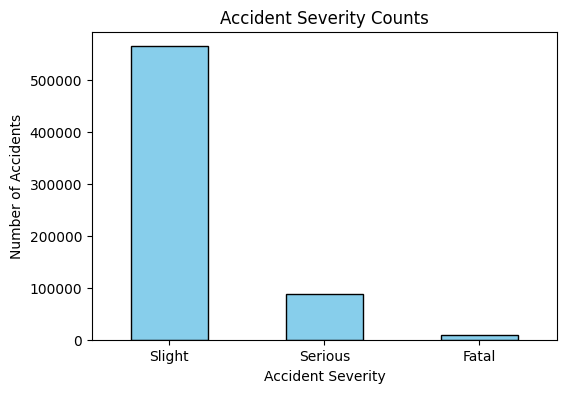

In [51]:
import matplotlib.pyplot as plt

severity_counts = accident['Accident_Severity'].value_counts()

plt.figure(figsize=(6,4))
severity_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Accident Severity Counts")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.show()

<h3>Q2. Number of Vehicles Involved under Different Weather Conditions</h3>

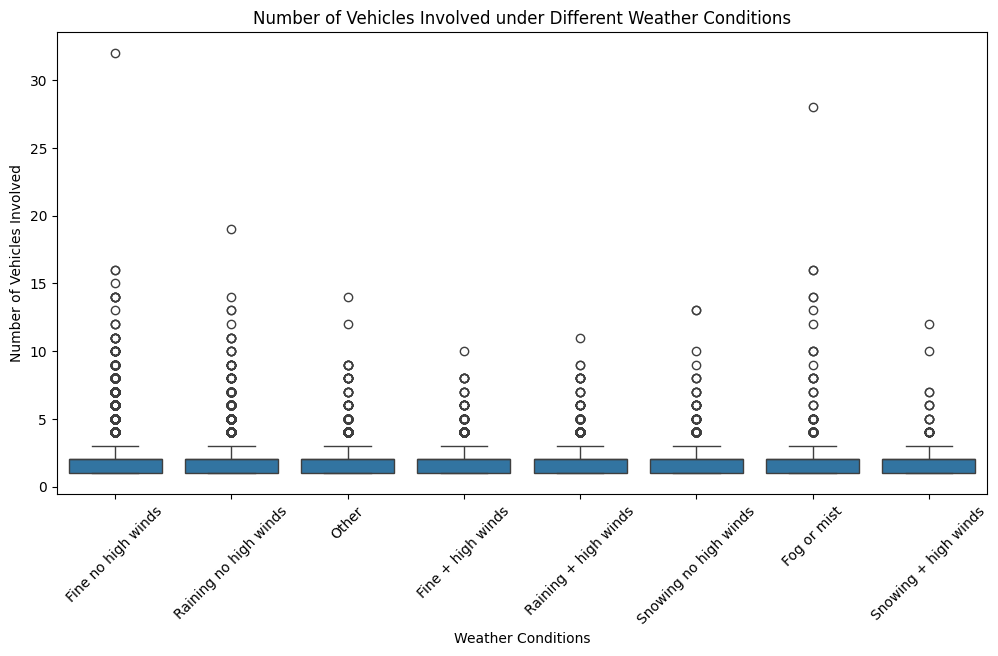

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(
    data=accident,
    x="Weather_Conditions",
    y="Number_of_Vehicles"
)
plt.title("Number of Vehicles Involved under Different Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Vehicles Involved")
plt.xticks(rotation=45)
plt.show()


<h3>Q3. Road Surface Condition with the highest number of accidents?</h3>

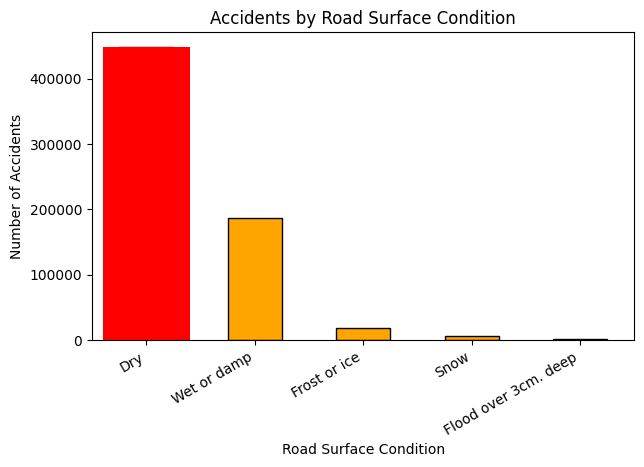

In [53]:
import matplotlib.pyplot as plt

# Count accidents by road surface
road_surface_counts = accident['Road_Surface_Conditions'].value_counts()

# Display the highest

# Plot bar graph
plt.figure(figsize=(7,4))
road_surface_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Accidents by Road Surface Condition")
plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=30, ha='right')

# Highlight the highest
plt.bar(highest_surface, highest_count, color='red')

plt.show()


<h3>Q4.In 2022, how many accidents happened, and what were the counts by Road Type?</h3>

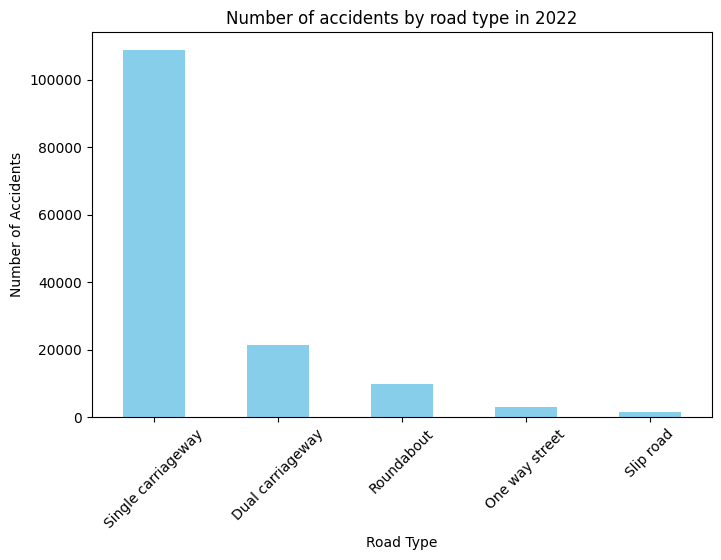

In [83]:
import matplotlib.pyplot as plt

df_2022 = accident[accident['Year'] == 2022]

road_counts = df_2022['Road_Type'].value_counts()
road_counts.plot(kind='bar', figsize=(8,5), color='skyblue')

plt.title('Number of accidents by road type in 2022')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


<h3>Q5. Which month had the highest average casualties?</h3>

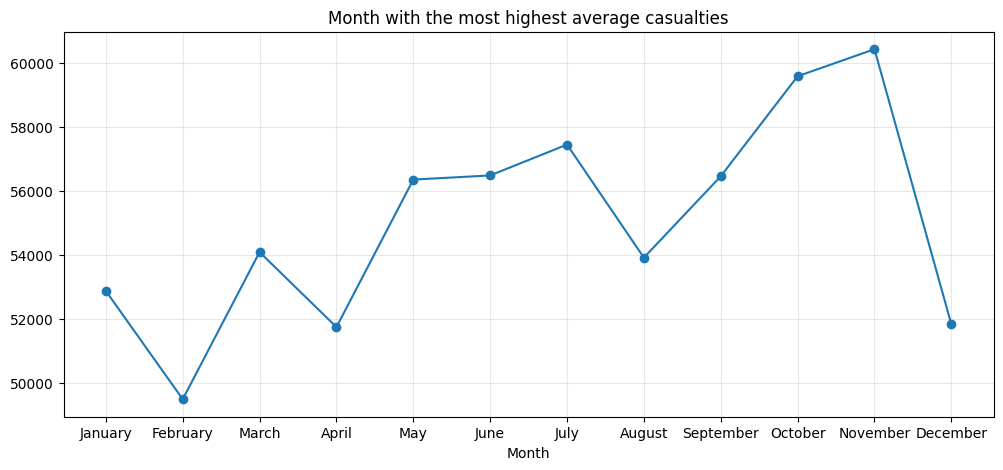

In [33]:
import matplotlib.pyplot as plt
monthly_cas = accident.groupby('Month')['Number_of_Casualties'].count()

monthly_cas.plot(
    marker = 'o',
    figsize =(12,5),
    title = 'Month with the most highest average casualties'
)
plt.xticks(range(1,13), ['January','February','March','April','May', 'June','July','August','September','October','November','December'])
plt.grid(alpha=0.3)
plt.show()

<h3>Q6. Average number of vehicles involved per Vehicle Type.</h3>

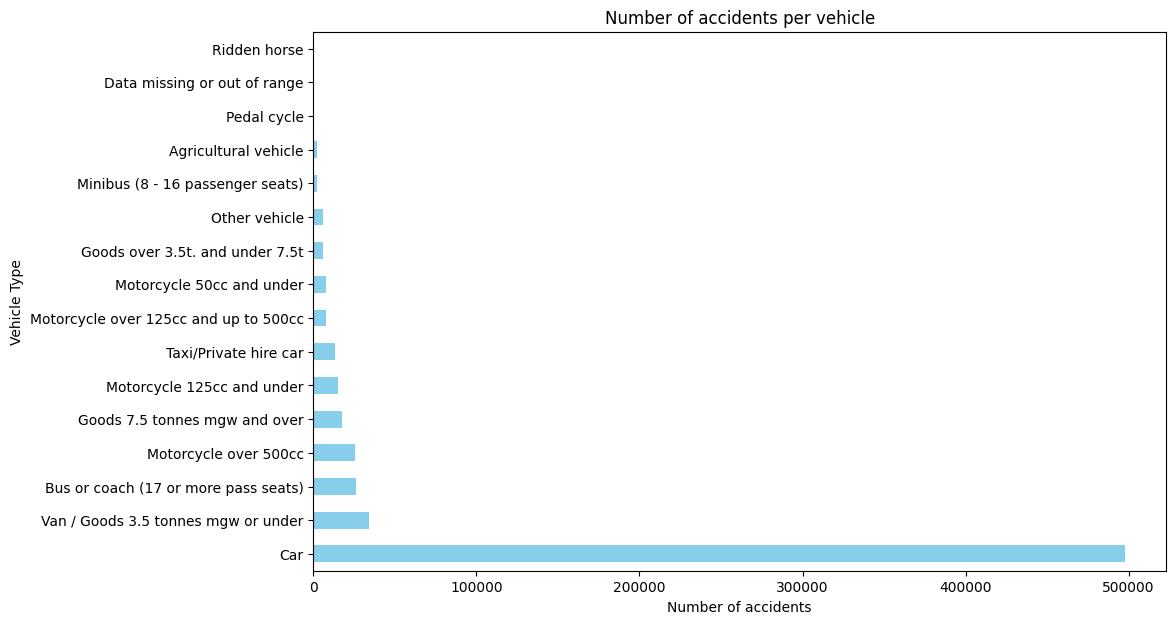

In [93]:
import matplotlib.pyplot as plt

counts_vehicles = accident['Vehicle_Type'].value_counts()
counts_vehicles.plot(kind='barh',figsize=(11,7), color='skyblue')
plt.title("Number of accidents per vehicle")
plt.xlabel("Number of accidents")
plt.ylabel("Vehicle Type")
plt.show()

<h3>Q7. Number of casualties per year</h3>

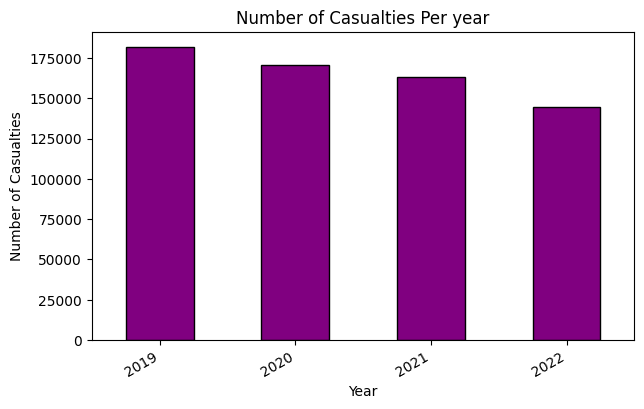

In [61]:
import matplotlib.pyplot as plt


casualties_per_year = accident['Year'].value_counts().sort_index()

plt.figure(figsize=(7,4))
casualties_per_year.plot(kind='bar', color='purple', edgecolor='black')

plt.title("Number of Casualties Per year")
plt.xlabel("Year")
plt.ylabel("Number of Casualties")
plt.xticks(rotation=30, ha='right')

highest_year = casualties_per_year.idxmax()
highest_count = casualties_per_year.max()
plt.bar(highest_year, highest_count)

plt.show()


<h3>Q8.What are the road surface conditions per year?</h3>

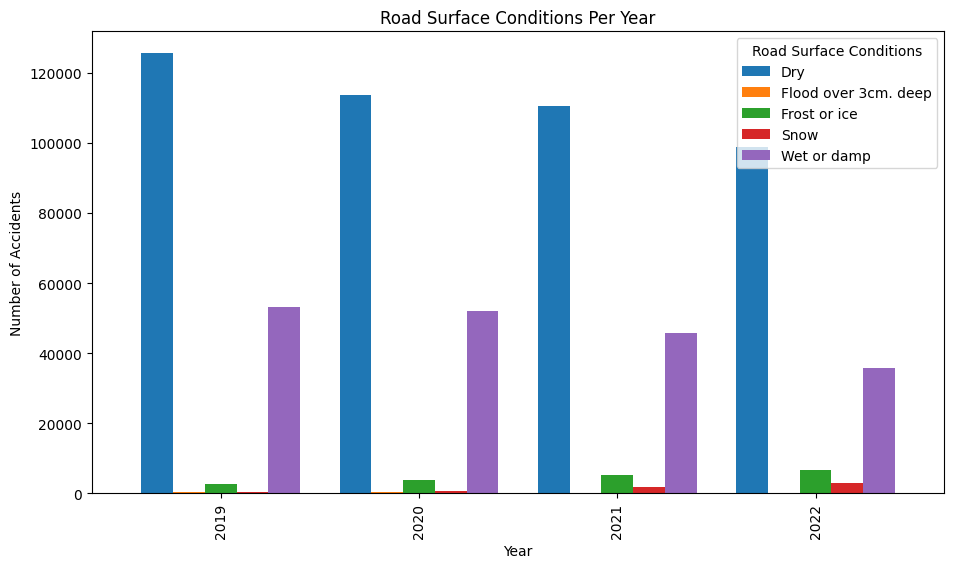

In [81]:
import matplotlib.pyplot as plt

data = accident.groupby(['Year','Road_Surface_Conditions']).size().unstack()

data.plot(
    kind ='bar',
    figsize =(11,6),
    width=0.8
)
plt.title('Road Surface Conditions Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Road Surface Conditions')
plt.show()